**DATASET EXHCANGE CURRENCY USD**

https://data.oecd.org/conversion/exchange-rates.htm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn

In [2]:
#Importing Dataset
dataset = pd.read_csv('exchangedata.csv')

In [3]:
dataset.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EXCH,TOT,NATUSD,A,1950,0.892857,NaN
1,AUS,EXCH,TOT,NATUSD,A,1951,0.892857,NaN
2,AUS,EXCH,TOT,NATUSD,A,1952,0.892857,NaN
3,AUS,EXCH,TOT,NATUSD,A,1953,0.892857,NaN
4,AUS,EXCH,TOT,NATUSD,A,1954,0.892857,NaN


In [4]:
dataset = dataset.drop(['Flag Codes', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY'], axis=1)

In [5]:
dataset.head()

,LOCATION,TIME,Value
0,AUS,1950,0.892857
1,AUS,1951,0.892857
2,AUS,1952,0.892857
3,AUS,1953,0.892857
4,AUS,1954,0.892857


In [6]:
df_indo = dataset[dataset['LOCATION'] == 'IDN']
df_indo.head()

,LOCATION,TIME,Value
2405,IDN,1967,149.583333
2406,IDN,1968,296.291667
2407,IDN,1969,326.000000
2408,IDN,1970,362.833333
2409,IDN,1971,391.875000


In [7]:
df_krisis = df_indo[df_indo['TIME'] <= 1997]
df_krisis.head()

,LOCATION,TIME,Value
2405,IDN,1967,149.583333
2406,IDN,1968,296.291667
2407,IDN,1969,326.000000
2408,IDN,1970,362.833333
2409,IDN,1971,391.875000


In [8]:
df_krisis["Value"].mean()

1096.8067895161291

c:\users\wisnoe\anaconda3\envs\coba\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


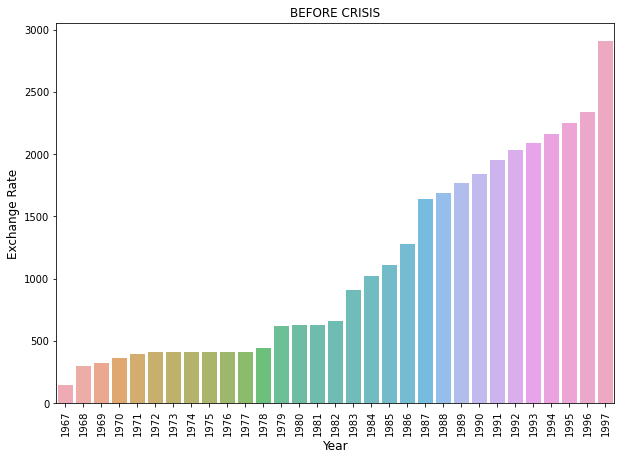

In [9]:
plt.figure(figsize=(10,7))
sns.barplot(df_krisis['TIME'], df_krisis['Value'], alpha=0.8)
plt.title('BEFORE CRISIS')
plt.ylabel('Exchange Rate', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=12)
plt.show()

In [10]:
df_afterkrisis = df_indo[df_indo['TIME'] >= 1998]
df_afterkrisis.head()

,LOCATION,TIME,Value
2436,IDN,1998,10013.622500
2437,IDN,1999,7855.150000
2438,IDN,2000,8421.775000
2439,IDN,2001,10260.850000
2440,IDN,2002,9311.191667


c:\users\wisnoe\anaconda3\envs\coba\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


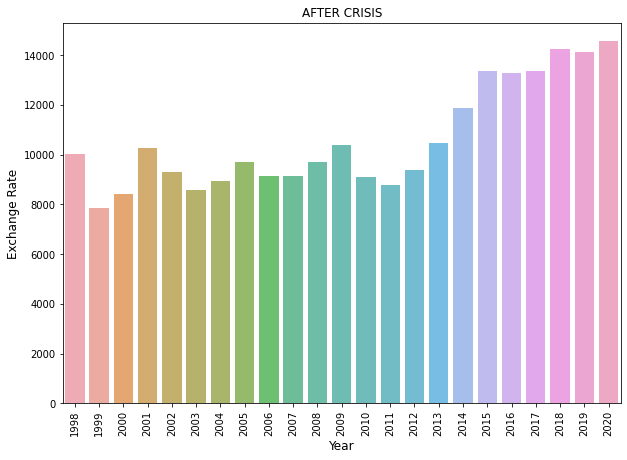

In [11]:
plt.figure(figsize=(10,7))
sns.barplot(df_afterkrisis['TIME'], df_afterkrisis['Value'], alpha=0.8)
plt.title('AFTER CRISIS')
plt.ylabel('Exchange Rate', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=12)
plt.show()

In [13]:
df_after97 = df_indo[df_indo['TIME'] == 1998]
df_krisis97 = df_indo[df_indo['TIME'] == 1997]

after = df_after97.iloc[0]['Value']
before = df_krisis97.iloc[0]['Value']
print((after - before) /100, '%') 

71.042425 %


**DATASET INFLATION BASED ON CPI (Customer Price Index)**

https://data.oecd.org/price/inflation-cpi.htm

ENRG = energy

FOOD = food

TOT_FOODENRG = total food & energy

In [14]:
dataset2 = pd.read_csv('inflation.csv')

In [15]:
dataset2.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070,NaN
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801,NaN
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540,NaN
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470,NaN
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195,NaN


In [16]:
dataset2 = dataset2.drop(['Flag Codes', 'INDICATOR', 'FREQUENCY'], axis=1)

In [17]:
dataset2.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,ENRG,AGRWTH,1972,4.910070
1,AUS,ENRG,AGRWTH,1973,3.762801
2,AUS,ENRG,AGRWTH,1974,13.173540
3,AUS,ENRG,AGRWTH,1975,19.422470
4,AUS,ENRG,AGRWTH,1976,8.833195


In [18]:
df_indo2 = dataset2[dataset2['LOCATION'] == 'IDN']
df_indo2

,LOCATION,SUBJECT,MEASURE,TIME,Value
5227,IDN,TOT,AGRWTH,1969,15.479880
5228,IDN,TOT,AGRWTH,1970,12.399460
5229,IDN,TOT,AGRWTH,1971,4.233751
5230,IDN,TOT,AGRWTH,1972,6.521739
5231,IDN,TOT,AGRWTH,1973,31.041890
...,...,...,...,...,...
262476,IDN,TOT,IDX2015,2021-03,117.839800
262477,IDN,TOT,IDX2015,2021-04,117.995200
262478,IDN,TOT,IDX2015,2021-05,118.372700
262479,IDN,TOT,IDX2015,2021-06,118.183900


In [19]:
# find same value SUBJECT column
checksubject = dataset2.drop_duplicates(subset='SUBJECT', keep="last")
checksubject

,LOCATION,SUBJECT,MEASURE,TIME,Value
282821,EU27_2020,ENRG,IDX2015,2021-06,110.21
283080,EU27_2020,FOOD,IDX2015,2021-06,111.03
283339,EU27_2020,TOT,IDX2015,2021-06,108.65
283586,EU27_2020,TOT_FOODENRG,IDX2015,2021-06,107.20


In [20]:
# find same value at MEASURE column
checkmeasure = dataset2.drop_duplicates(subset='MEASURE', keep="last")
checkmeasure

,LOCATION,SUBJECT,MEASURE,TIME,Value
282574,EU27_2020,TOT_FOODENRG,AGRWTH,2021-06,1.2
283586,EU27_2020,TOT_FOODENRG,IDX2015,2021-06,107.2


**(Customer Price Index) Based on MEASURE**

AGRWTH = Annual growth rate (%)

IDX2015 = 2015=100

https://fgeerolf.com/data/oecd/DP_LIVE.html

In [35]:
df_indo_before = df_indo2[(df_indo2['TIME'] <= '1997')]
df_indo_before.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
5227,IDN,TOT,AGRWTH,1969,15.479880
5228,IDN,TOT,AGRWTH,1970,12.399460
5229,IDN,TOT,AGRWTH,1971,4.233751
5230,IDN,TOT,AGRWTH,1972,6.521739
5231,IDN,TOT,AGRWTH,1973,31.041890


c:\users\wisnoe\anaconda3\envs\coba\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


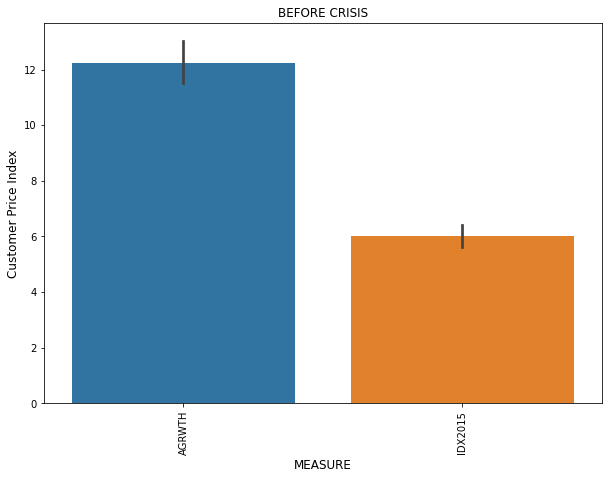

In [45]:
plt.figure(figsize=(10,7))
sns.barplot(df_indo_before['MEASURE'], df_indo_before['Value'])
plt.title('BEFORE CRISIS')
plt.ylabel('Customer Price Index', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('MEASURE', fontsize=12)
plt.show()

In [37]:
df_indo_after = df_indo2[(df_indo2['TIME'] >= '1998')]
df_indo_after.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
5256,IDN,TOT,AGRWTH,1998,58.451050
5257,IDN,TOT,AGRWTH,1999,20.477830
5258,IDN,TOT,AGRWTH,2000,3.688618
5259,IDN,TOT,AGRWTH,2001,11.500120
5260,IDN,TOT,AGRWTH,2002,11.900120


c:\users\wisnoe\anaconda3\envs\coba\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


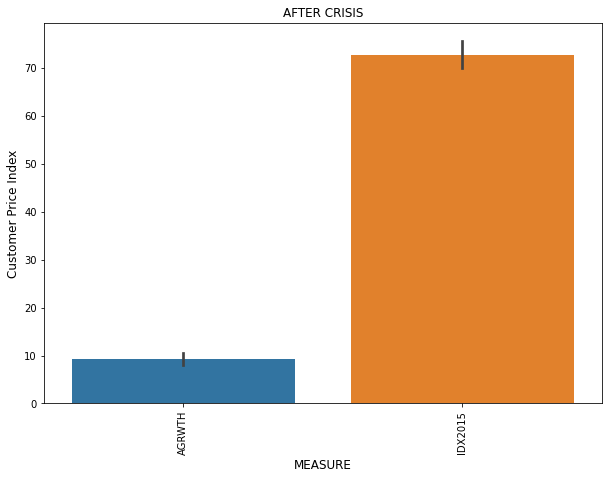

In [42]:
plt.figure(figsize=(10,7))
sns.barplot(df_indo_after['MEASURE'], df_indo_after['Value'])
plt.title('AFTER CRISIS')
plt.ylabel('Customer Price Index', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('MEASURE', fontsize=12)
plt.show()

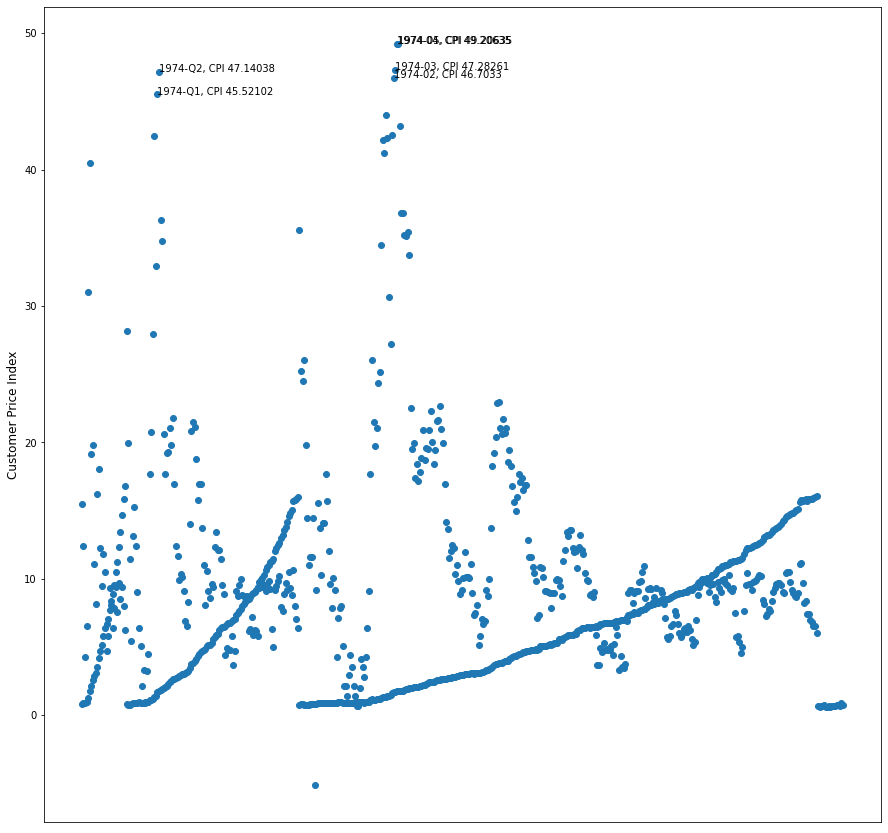

In [52]:
fig, ax = plt.subplots(figsize=(15,15))
x = df_indo_before['TIME'].array
y = df_indo_before['Value'].array
plt.ylabel('Customer Price Index', fontsize=12)
ax.scatter(x, y)
ax.axes.get_xaxis().set_ticks([])
for i, year in enumerate(x):
    if y[i] > 45:
        label = year + ", CPI " + str(y[i])
    else:
        label = ''
    ax.annotate(label, (x[i], y[i]))

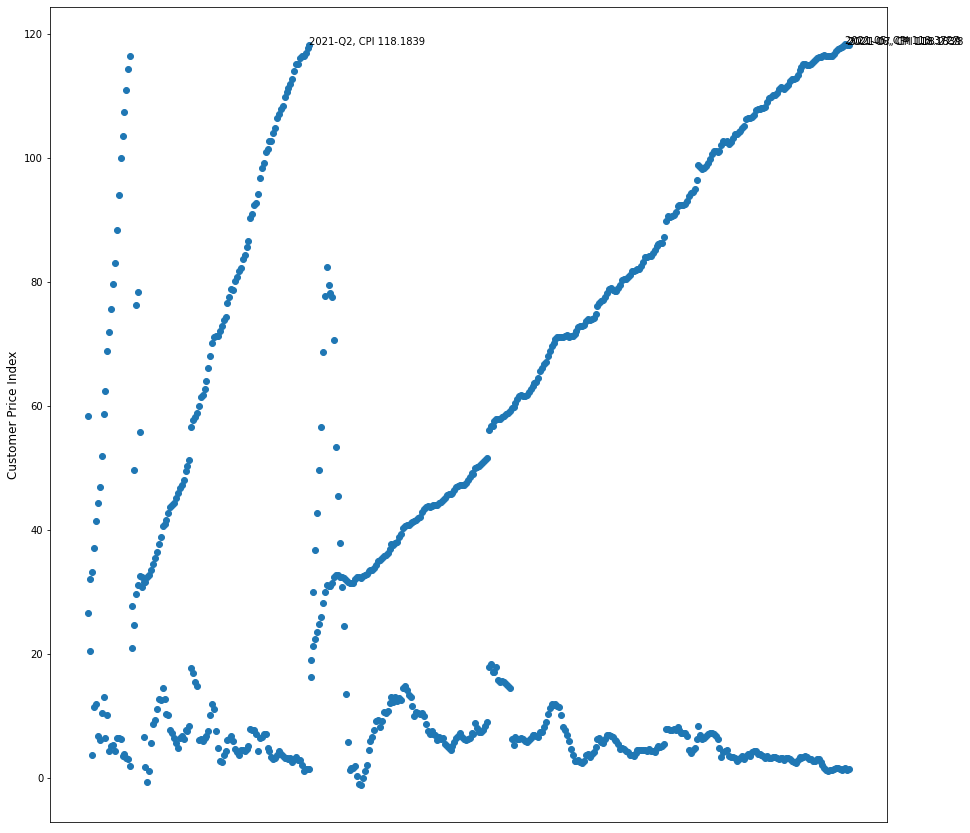

In [55]:
fig, ax = plt.subplots(figsize=(15,15))
x = df_indo_after['TIME'].array
y = df_indo_after['Value'].array
plt.ylabel('Customer Price Index', fontsize=12)
ax.scatter(x, y)
ax.axes.get_xaxis().set_ticks([])
for i, year in enumerate(x):
    if y[i] > 118:
        label = year + ", CPI " + str(y[i])
    else:
        label = ''
    ax.annotate(label, (x[i], y[i]))